<font size=4, font color=purple>The "unsinkable" Titanic met her doom on April 15, 1912. There were not enough lifeboats to rescue the over 2,200 passengers aboard; about 1,500 people died. There were many factors contributing to an individual's chances of survival. With this dataset, I explored the types of people likely to have died or lived.</font>



<font size=4, font color=blue> Download the dataset</font>


In [97]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [98]:
traindata = pd.read_csv('/Users/soniamorris/Downloads/all/train.csv')
traindata


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<font size = 4, font color = black> Some of these variables are self-explanatory. Below I've described the more ambiguous ones:</font>
    
    SibSp: number of siblings and spouses aboard per passenger
    Parch: number of parents and children aboard per passenger
    Fare:  cost of ticket
    Cabin: cabin number
    Embarked: the port (S = Southampton; C = Cherbourge; Q = Queenstown)
    Pclass: 1st class, 2nd class or 3rd class
    

In [59]:
traindata.describe()

#these describe some statistics of passengers. The average fare, for instance, was $32.20

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font size = 4, font color = blue> The data has no discrepancies and won't need to be cleaned.

</font>

<font size = 3>(Just kidding...there will always be cleaning...)</font>


In [60]:
#are there any null values in this dataset?
traindata.isnull().values.any()

True

In [61]:
#yes there are...which variables have null values?

traindata.isnull().sum()

#0 = this column has no null values
#not 0 = the number of null values this column has

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

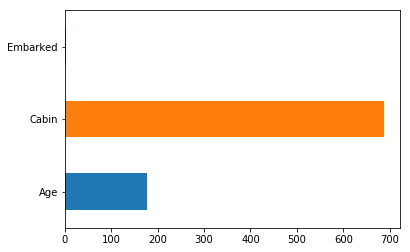

In [62]:
"""Let's compare the number of null values"""

null_data = traindata.isnull().sum()


# null_data > 0 is the same as saying "null data in these columns exist". 
#a mask will display the amount of null data values
mask = null_data > 0

null_data = null_data[mask].plot(kind='barh')

In [63]:
"""Drop rows in Embarked that are empty"""
#not permanent because inplace not set to True

embarkedmask = traindata['Embarked'].notnull()

In [8]:
embarkedmask

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
861    True
862    True
863    True
864    True
865    True
866    True
867    True
868    True
869    True
870    True
871    True
872    True
873    True
874    True
875    True
876    True
877    True
878    True
879    True
880    True
881    True
882    True
883    True
884    True
885    True
886    True
887    True
888    True
889    True
890    True
Name: Embarked, Length: 891, dtype: bool

In [9]:
traindata.head(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [10]:
"""fill all empty cabins with ¯\(ツ)/¯"""  

newtraindata= traindata['Cabin'].fillna('¯\(ツ)/¯', inplace=True)

newtraindata

In [11]:
traindata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C


In [12]:
newtraindata1 = traindata[embarkedmask]

In [13]:
traindata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C


In [14]:
traindata['Embarked'].isnull().sum()

2

<font size = 4, font color = blue> Feature Extraction 
    
   
<font size = 3, font color = black> We can create new features(variables) with existing ones!


In [15]:
"""Create column FamilyCount"""

traindata['FamilyCount'] = traindata['SibSp'] + traindata['Parch'] #number of members per family aboard

traindata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C,1


<font size = 3, font color = black> Many names are followed by special titles. I'll extract each from the names.

In [16]:
foo = traindata.iloc[1,3] #index 1 down gets us to the 2nd row. "Name" is index 3.
foo

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [17]:
foo.find(',')

7

In [18]:
foo.find('Cumings')

0

In [19]:
before_period = foo[:12]

In [20]:
before_period

'Cumings, Mrs'

In [21]:
after_comma = before_period[8:]

In [22]:
after_comma = after_comma.strip()

In [23]:
bar = foo.split('.')

In [24]:
bar = bar[0].split(',')

In [25]:
bar = bar[-1]

In [26]:
bar.strip()

'Mrs'

In [27]:
traindata['Title'] = traindata['Name'].map(lambda x: x.split('.')[0].split(',')[-1].strip())

traindata.Title.value_counts()

#A Jonkheer is a lowly ranked title of nobility in the Netherlands and Belgium!

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Don               1
Ms                1
Lady              1
Mme               1
Sir               1
the Countess      1
Capt              1
Jonkheer          1
Name: Title, dtype: int64

In [28]:
traindata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q,0,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,S,4,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S,2,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,C,1,Mrs


<font size= 4, font color= black> There are 6 Reverends on board. I'll create a new column with binary values specifying whether a passenger was a Reverend

In [29]:
(traindata['Title'] == 'Rev').sum()

6

In [30]:
mask = (traindata['Title'] == 'Rev').map(int)
mask

# 0: passenger is not a Reverend
# 1: passenger is a Reverend

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
861    0
862    0
863    0
864    0
865    0
866    0
867    0
868    0
869    0
870    0
871    0
872    0
873    0
874    0
875    0
876    0
877    0
878    0
879    0
880    0
881    0
882    0
883    0
884    0
885    0
886    1
887    0
888    0
889    0
890    0
Name: Title, Length: 891, dtype: int64

In [31]:
"""Create IsReverend Column"""

traindata['IsReverend'] = (traindata['Title'] == 'Rev').map(int)

In [32]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
FamilyCount    891 non-null int64
Title          891 non-null object
IsReverend     891 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


<font size = 4, font color = black> Dummy variables are created to represent when categorical values occur(value=1) and when they do not(value=0). 

In [33]:
# For example, Mr. Owen Harris Braund boarded the Titanic at Southampton(as indicated under "Embarked_S" as 1).

pd.get_dummies(traindata, columns=["Embarked"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,Title,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,Mr,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,Mrs,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,Miss,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,Mrs,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,Mr,0,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯\(ツ)/¯,0,Mr,0,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,0,Mr,0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯\(ツ)/¯,4,Master,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,2,Mrs,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯\(ツ)/¯,1,Mrs,0,1,0,0


In [34]:
#Mr. Owen Harris Braunt is male(indicated by Sex_male as 1)

pd.get_dummies(traindata, columns=["Sex"])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Title,IsReverend,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,Mr,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,Miss,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,Mrs,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,Mr,0,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,¯\(ツ)/¯,Q,0,Mr,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,0,Mr,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,¯\(ツ)/¯,S,4,Master,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,¯\(ツ)/¯,S,2,Mrs,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,¯\(ツ)/¯,C,1,Mrs,0,1,0


<font size = 4, font color = blue> Interpreting the data

<font size = 3, font color = black> What will this analysis tell us? Numbers only tell us so much...it's much easier to visualize results!

In [35]:
"Overall survival rate"

traindata['Survived'].mean()

#about 38% of people survived the sinking...not one of White Star Line's finer moments

0.3838383838383838

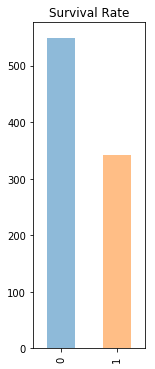

In [171]:
fig = plt.figure(figsize=(2,6))

traindata.Survived.value_counts().plot(kind="bar",alpha=0.5, title='Survival Rate');

#0: did not survive
#1: did survive

In [178]:
traindata.groupby('Sex').Survived.mean()



Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<font size = 3, font color = black> Men fared the worst - about 81% died(19% survival rate).

In [173]:
#survival rate per class

traindata.groupby('Pclass').Survived.mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<font size = 3, font color = black> Sadly, the poorest were the unluckiest, with only 24% in 3rd class surviving

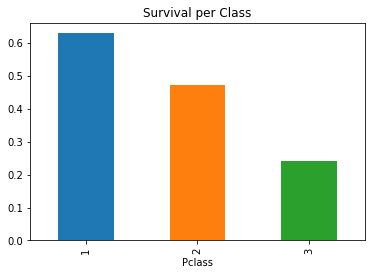

In [174]:
traindata.groupby('Pclass')['Survived'].mean().plot(kind='bar', title='Survival per Class');

#It's worse seeing the statistics graphically, isn't it?

In [177]:
traindata.groupby('IsReverend').Survived.mean()



IsReverend
0    0.386441
1    0.000000
Name: Survived, dtype: float64

<font size = 3, font color = black> Predictably, none of the Reverends survived either. They would have stayed on the ship as long as they could have to comfort other passengers.

In [88]:
traindata.loc[(traindata['Cabin'].isnull()), 'Survived']

0      0
2      1
4      0
5      0
7      0
8      1
9      1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
22     1
24     0
25     1
26     0
28     1
29     0
30     0
32     1
33     0
34     0
35     0
36     1
37     0
38     0
      ..
852    0
854    0
855    1
856    1
858    1
859    0
860    0
861    0
863    0
864    0
865    1
866    1
868    0
869    1
870    0
873    0
874    1
875    1
876    0
877    0
878    0
880    1
881    0
882    0
883    0
884    0
885    0
886    0
888    0
890    0
Name: Survived, Length: 687, dtype: int64

In [89]:
#what was the survival rate for those in cabins marked with the shrug emoji?
traindata.loc[(traindata['Cabin'].isnull()), 'Survived'].mean()


0.29985443959243085

In [90]:
#survival rate for those whose age contains a null value

emptyage = traindata['Age'].isnull().mean()

emptyage



0.19865319865319866

In [44]:
#Survival rate for those boarding at each port

ports = traindata.groupby('Embarked').Survived.mean() 

ports

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<font size = 4, font color = black> Boolean masks are helpful for extracting information based on certain criterion. 

In [49]:
#What is the survival rate for first class passengers under the age of 12?

agemask = traindata['Age'] < 12 #we look at everyone under the age of 12
class_one = traindata['Pclass'] ==1 #we look at everyone in first class

first_class = traindata[class_one & agemask]['Survived'].mean() #we look at everyone under age 12 in first class

first_class

0.75

In [50]:
agemask1 = traindata['Age'] < 12
class_two = traindata['Pclass'] == 2

second_class = traindata[class_two & agemask1]['Survived'].mean()

second_class

1.0

In [51]:
agemask2 = traindata['Age'] < 12
class_three = traindata['Pclass'] == 3

third_class = traindata[class_three & agemask2]['Survived'].mean()

third_class

0.40425531914893614

In [92]:
"""Of all the people who died, who had most expensive ticket? How much was it?"""

expensive_death = traindata.loc[traindata['Survived'] == 0, 'Fare'].max() #locate(loc) those who died and the maximum amount('Fare') they paid
expensive_death

263.0

In [93]:
traindata[(traindata['Survived']==0) & (traindata['Fare'] == expensive_death)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


<font size = 3, font color = black> (Mark Unfortunate and Charles Unfortunate?)

In [95]:
#Is it better to travel alone, with a large family or with a small family?

traindata['Family_Number'] = traindata['Parch'] + traindata['SibSp'] 
traindata['Family_Number'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_Number, dtype: int64

<font size = 4, font color = black> (Mark Unfortunate and Charles Unfortunate?)

In [92]:
training_data_og.groupby('Family_Number')['Survived'].mean()

Family_Number
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

<font size= 3, font color = black>The best case scenario is having a family no greater than 3 people(survival rate about 72%). However, any more family members than that and your chances of survival diminish greatly.



<font size = 4, font color = blue> A few more pictures

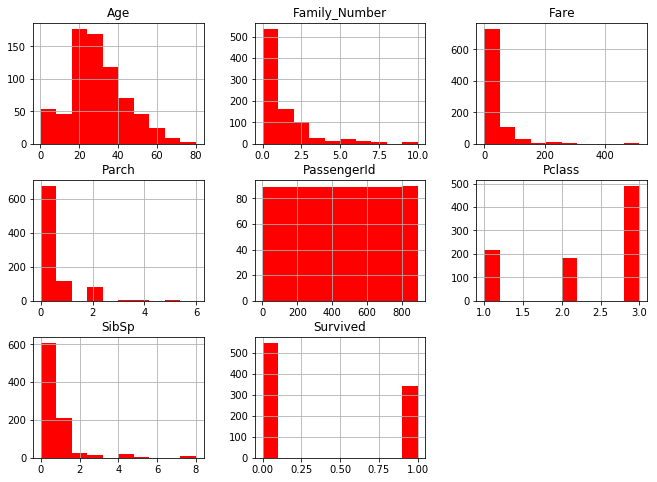

In [96]:
traindata.hist(bins=10,figsize=(11,8),grid=True, color = 'red');


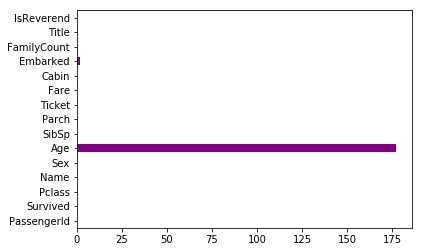

In [188]:
#how many null values in each variable?
traindata.isnull().sum().plot(kind="barh", color = 'purple');

<font size = 3, font color = black>Edith was a popular name for women in 1912, the year the Titanic sank. Below is a list of all the passengers with "Edith" as a first or middle name. 

Of the 6, 5 were in first class and survived. One was in 3rd class and died. Interestingly enough, they all boarded from Southampton.

In [69]:
traindata.loc[traindata['Name'].str.contains('Edith')] #locates any string containing the phrase "Edith" in the "Name" variable

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


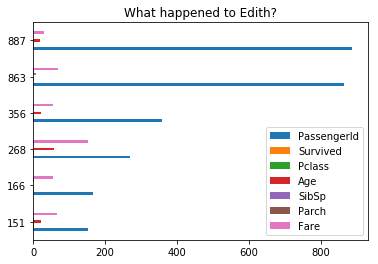

In [71]:
traindata.loc[traindata['Name'].str.contains('Edith')].plot(kind='barh', title='What happened to Edith?');

<font size = 3, font color = black>Reginald was a popular name for men in England at the time of the Titanic sinking. All 3 were in 2nd class and unfortunately, all died. (All boarded at Southhampton)

In [72]:
traindata.loc[traindata['Name'].str.contains('Reginald')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0,NaN,S
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5,NaN,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0,NaN,S


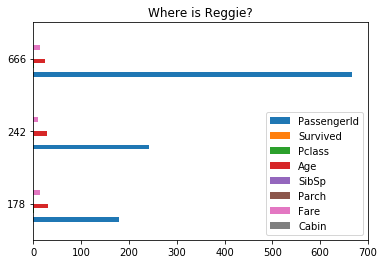

In [73]:
traindata.loc[traindata['Name'].str.contains('Reginald')].plot(kind='barh', title='Where is Reggie?');

In [75]:
#average age of a passenger?
traindata['Age'].mean()


29.69911764705882

In [100]:
#average cost of a ticket?
traindata['Fare'].mean()

32.09668087739029

In [101]:
#median cost of a ticket?
traindata['Fare'].median()

14.4542

In [76]:
#average cost of a ticket according to each class?
traindata.groupby('Pclass').Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

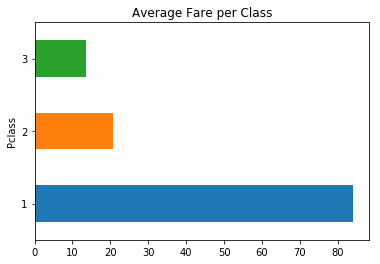

In [77]:
traindata.groupby('Pclass').Fare.mean().plot(kind='barh', title= 'Average Fare per Class');

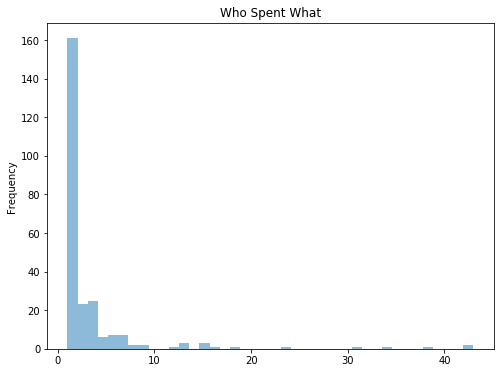

In [80]:
fig = plt.figure(figsize=(8,6))

traindata.Fare.value_counts().plot(kind="hist",alpha=0.5, bins = 40, title='Who Spent What') ;

In [81]:
#how many people embarked at each port?
traindata['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

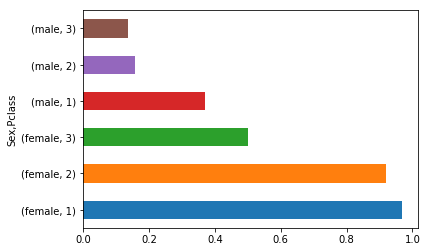

In [82]:
#survival rates, grouped by gender and class
traindata.groupby(['Sex', 'Pclass'])['Survived'].mean().plot(kind='barh');

#for example, the chances of surviving for 1st class women are almost 100%

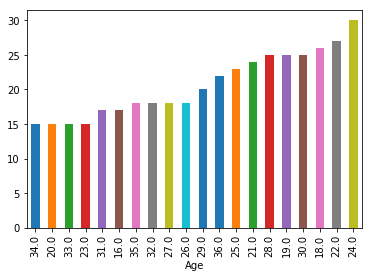

In [83]:
traindata.groupby('Age')['PassengerId'].count().sort_values().tail(20).plot(kind='bar');

#shows thirty 24 year olds, twenty-five 22 year olds, ect

In [84]:
#what were the chances of survival over the age of 70?

seventyplus = traindata['Age'] > 70


survive = traindata[seventyplus]['Survived'].mean()

survive

0.2

In [87]:
traindata.groupby(['Age', 'Sex']).size()

Age    Sex   
0.42   male      1
0.67   male      1
0.75   female    2
0.83   male      2
0.92   male      1
1.00   female    2
       male      5
2.00   female    6
       male      4
3.00   female    2
       male      4
4.00   female    5
       male      5
5.00   female    4
6.00   female    2
       male      1
7.00   female    1
       male      2
8.00   female    2
       male      2
9.00   female    4
       male      4
10.00  female    1
       male      1
11.00  female    1
       male      3
12.00  male      1
13.00  female    2
14.00  female    4
       male      2
                ..
51.00  male      6
52.00  female    2
       male      4
53.00  female    1
54.00  female    3
       male      5
55.00  female    1
       male      1
55.50  male      1
56.00  female    1
       male      3
57.00  female    1
       male      1
58.00  female    3
       male      2
59.00  male      2
60.00  female    1
       male      3
61.00  male      3
62.00  female    1
       male      